## Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

Ridge Regression, also known as L2 regularization, is a linear regression technique that extends Ordinary Least Squares (OLS) regression. It addresses issues such as multicollinearity and overfitting in linear regression models.

Ordinary Least Squares (OLS) regression is a widely used linear regression technique used to model the relationship between one or more predictor variables (independent variables) and a response variable (dependent variable). It aims to find the best-fitting linear relationship that minimizes the sum of squared differences between the observed values of the response variable and the values predicted by the model.

In Ridge Regression, a regularization term proportional to the squared magnitudes of the coefficients is added to the standard linear regression objective. This term penalizes large coefficient values, which helps prevent individual predictor variables from dominating the model. The objective of Ridge Regression is to find the coefficients that minimize the sum of squared differences between observed and predicted values, while also keeping the coefficient magnitudes as small as possible.

The key component of Ridge Regression is the regularization parameter, often denoted as λ (lambda), which controls the strength of the regularization. As λ increases, the impact of the regularization term becomes stronger, resulting in smaller coefficient estimates. When λ is set to zero, Ridge Regression is equivalent to OLS regression.

Key differences from OLS:

- Regularization: Ridge adds a penalty term based on coefficient magnitudes.
- Coef. Magnitudes: Ridge encourages smaller coefficient values.
- Multicollinearity: Ridge helps handle correlated predictor variables better.
- λ Parameter: Ridge requires tuning the λ hyperparameter.
- Objective Function: Ridge minimizes sum of squared residuals + λ * (sum of squared coefficients).
- Overfitting: Ridge mitigates overfitting by shrinking coefficients.
- Flexibility: OLS doesn't include a regularization term, so coefficients can be larger.
- Complexity: Ridge strikes a balance between data fit and model simplicity


Ridge Regression extends OLS regression by adding a regularization term that encourages smaller coefficient values and helps address issues like multicollinearity and overfitting. 

## Q2. What are the assumptions of Ridge Regression?

Assumptions of Ridge Regression are :

1. Linearity: The relationship between the predictor variables and the response variable is assumed to be linear.

2. Independence: The residuals (errors) should be independent of each other. There should be no pattern or correlation in the residuals.

3. Homoscedasticity: Homoscedasticity means that the variability of the residuals should be constant across all levels of the predictor variables. In the context of Ridge Regression, this assumption still holds.

4. Normality of Residuals: The residuals should follow a normal distribution. While Ridge Regression does not significantly impact this assumption, it still helps ensure the reliability of hypothesis tests and confidence intervals.

5. Multicollinearity: Ridge Regression is particularly useful when dealing with multicollinearity, which is the high correlation between predictor variables. The assumption is that multicollinearity may exist, but Ridge Regression helps mitigate its impact by distributing the influence of correlated variables across the coefficients.

6. Regularization Strength (λ): Ridge Regression introduces the hyperparameter λ (lambda) that controls the strength of the regularization. An assumption is made that an appropriate value of λ can be selected through techniques like cross-validation.

7. No Perfect Multicollinearity: Ridge Regression assumes that there is no perfect multicollinearity, meaning no linear relationship between a combination of predictor variables.

8. Predictor Variability: The predictor variables should have variability across different samples. Extremely low variability in predictor variables can affect the stability of the regression estimates.

Assessing the assumptions and selecting an appropriate value for the regularization parameter λ are critical steps in applying Ridge Regression effectively.

## Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

Selecting the appropriate value of the tuning parameter (λ) in Ridge Regression is crucial for achieving the best balance between fitting the data and controlling model complexity. The goal is to choose a value of λ that minimizes prediction error while preventing overfitting. 

There techniques to select the optimal λ value:

1. Cross-Validation: Cross-validation involves dividing your dataset into training and validation sets multiple times. For each iteration, you train the Ridge Regression model on the training set and evaluate its performance on the validation set. By trying different values of λ and measuring how well the model generalizes, you can identify the λ that results in the lowest validation error. Common cross-validation methods include k-fold cross-validation and leave-one-out cross-validation.

2. Grid Search: Perform a grid search over a range of λ values. You specify a set of λ values to try, and then use cross-validation to evaluate the performance of the Ridge Regression model for each value. The λ that yields the best cross-validation performance is selected.

3. Regularization Path: Calculate the entire regularization path, which shows how the coefficients change across different values of λ. This can help you visualize the impact of regularization on the coefficients and guide your choice of λ based on the trade-off between coefficient shrinkage and model fit.

4. Information Criteria: Some information criteria, such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), can be used to select λ. These criteria balance model fit and complexity, and the λ that minimizes the chosen criterion is selected.

5. Validation Set Approach: Split your data into three sets: training, validation, and test sets. Train the Ridge Regression model on the training set for various λ values, evaluate its performance on the validation set, and select the λ that performs best. Finally, assess the model's performance on the test set to ensure unbiased evaluation.

6. Empirical Rule: Start with a wide range of λ values, from very small to very large. Train Ridge Regression models with these values and observe how the coefficients change. Use domain knowledge to narrow down the range and perform a more focused search around the selected range.

## Q4. Can Ridge Regression be used for feature selection? If yes, how?

Yes, Ridge Regression can be used for feature selection to some extent, although it's not primarily designed for this purpose. Ridge Regression's main objective is to handle multicollinearity and prevent overfitting by regularizing the coefficients. However, its regularization can indirectly lead to feature selection by shrinking less relevant features' coefficients towards zero.

Ways of using Ridge Regression for Feature Selection:

1. Coefficient Shrinkage: Ridge Regression applies a penalty to the magnitudes of the coefficients. This penalty is controlled by the regularization parameter λ. As λ increases, the coefficients are shrunk towards zero. Features with less impact on the target variable will have their coefficients reduced closer to zero.

2. Near-Zero Coefficients: As λ increases, features that have little predictive power tend to have coefficients that approach zero more quickly. This effectively reduces the influence of these features on the model's predictions.

3. Sparse Solutions: In some cases, Ridge Regression can lead to sparse solutions where some coefficients are exactly zero. This happens when λ is sufficiently large. Features corresponding to these zero coefficients can be considered as "selected out" by the regularization process.

However, Ridge Regression tends to retain all features to some extent, even if they are not highly relevant, due to its nature of shrinking coefficients rather than exactly eliminating them. If the goal is feature selection with the intent of creating a simpler model, other techniques like LASSO (Least Absolute Shrinkage and Selection Operator) or Elastic Net might be more appropriate. LASSO is specifically designed to encourage exact zero coefficients and, thus, explicit feature selection.

#### Implementing Ridge Regression for feature Selection

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression,  Ridge
#Making data set 
X, y = make_classification(n_samples=3000, n_features=10, n_informative=5, random_state=1)
X.shape, y.shape

((3000, 10), (3000,))

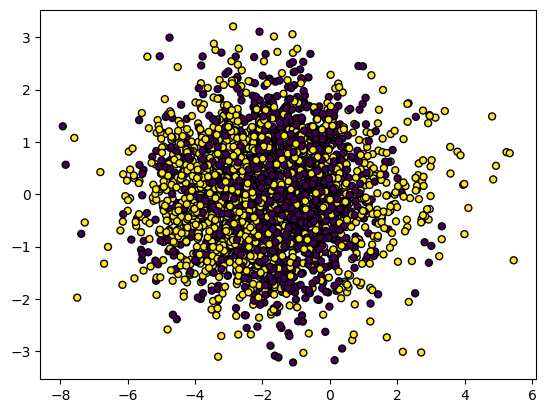

In [2]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2100, 10), (900, 10), (2100,), (900,))

In [4]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [5]:
ridge_logit =LogisticRegression(C=1, penalty='l2')
ridge_logit.fit(X_train, y_train)

LogisticRegression(C=1)

In [6]:
ridge_logit.coef_ 

array([[-0.13277895,  0.05414497,  0.00685467, -0.30917504,  0.05913938,
        -0.68259098,  0.25492662, -1.01353881, -0.81377215, -0.09242943]])

In [7]:
np.sum(ridge_logit.coef_ >= 0)

4

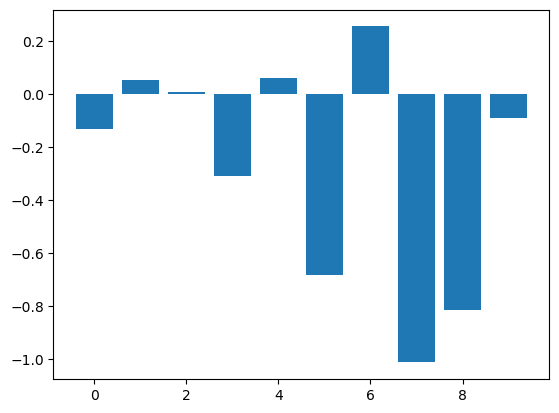

In [8]:
#Let’s draw the plot for feature importance.
importance = ridge_logit.coef_[0]
plt.bar([x for x in range(len(importance))], importance)
plt.show()


## Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

Ridge Regression is particularly effective at handling multicollinearity, which is the presence of high correlation among predictor variables. Multicollinearity can pose challenges in linear regression models, as it can lead to unstable coefficient estimates and difficulty in interpreting the individual effects of correlated predictors. Ridge Regression addresses these issues by adding a regularization term to the objective function.

Here's how Ridge Regression performs in the presence of multicollinearity:

1. Even Coefficient Distribution: Multicollinearity often results in correlated predictor variables having similar coefficients. Ridge Regression mitigates this by redistributing the influence of correlated variables more evenly among the coefficients. This means that no single variable dominates the model due to high correlation.

2. Stability of Coefficients: In the presence of multicollinearity, OLS regression might lead to erratic and unstable coefficient estimates. Ridge Regression, on the other hand, provides stable coefficient estimates by penalizing large coefficients. This is especially helpful when some variables are almost linear combinations of others.

3. Impact on Interpretation: In OLS regression, correlated variables can have coefficients with unexpected signs and magnitudes, making interpretation challenging. In Ridge Regression, while coefficients are still shrunk, they remain more interpretable and less prone to erratic behavior.

4. Bias-Variance Trade-off: Ridge Regression introduces a bias in coefficient estimates due to the regularization term. However, this bias often leads to improved generalization performance on unseen data, as it helps prevent overfitting caused by multicollinearity.

5. Choice of λ: The strength of the regularization in Ridge Regression is controlled by the hyperparameter λ. By tuning λ appropriately, Ridge Regression can effectively balance the need to control multicollinearity's negative impact while still fitting the data well.

6. Partial Retention of Variables: While Ridge Regression helps with multicollinearity, it doesn't exactly eliminate variables or reduce coefficients to zero. It retains all variables to some extent, which can be an advantage when it's important not to disregard any predictors completely.

In summary, Ridge Regression is well-suited to address the challenges posed by multicollinearity. It provides stable, interpretable, and better generalizable coefficient estimates by redistributing the influence of correlated variables and controlling overfitting.

## Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Yes, Ridge Regression can handle both categorical and continuous independent variables. However, there are some considerations and steps you need to take when dealing with categorical variables in Ridge Regression.

Categorical variables need to be appropriately encoded before they can be used in Ridge Regression, as it is a numerical optimization technique.

Methods to handle categorical variables:

1. **Continuous Variables:** Continuous independent variables can be used directly in Ridge Regression without any special transformation. The coefficients for continuous variables represent the change in the response variable associated with a one-unit change in the predictor variable, while keeping other variables constant.

2. **Categorical Variables:** Categorical variables need to be converted into numerical form using techniques like one-hot encoding. Each category of a categorical variable is transformed into a binary (0 or 1) variable. For example, if you have a categorical variable "Color" with values "Red," "Blue," and "Green," you would create three binary dummy variables: "Color_Red," "Color_Blue," and "Color_Green." Ridge Regression treats these binary dummy variables as any other continuous variables in the model.

4. **Regularization for Dummy Variables:** Ridge Regression applies regularization to all predictor variables, including the dummy variables created for categorical variables. This ensures that the model's coefficients are controlled, preventing overfitting and balancing the influence of the variables.

5. **Scaling:** It's generally a good practice to standardize your continuous variables (mean = 0, standard deviation = 1) before using Ridge Regression. This ensures that the regularization term treats all variables equally.

6. **Intercept Term:** Remember to include an intercept (constant) term in the model. The intercept represents the baseline value of the response variable when all predictor variables are zero.


Ridge Regression can handle both categorical and continuous independent variables, but categorical variables need to be transformed using techniques like one-hot encoding before being used in the model. Regularization in Ridge Regression applies to all predictor variables, including dummy variables created for categorical variables.

## Q7. How do you interpret the coefficients of Ridge Regression?

Interpreting the coefficients of Ridge Regression requires considering the effect of regularization and the specific scaling of predictor variables. The interpretation differs slightly from that of Ordinary Least Squares (OLS) regression due to the presence of the regularization term. 

Ways to interpret the coefficients of Ridge Regression:

1. Magnitude: In Ridge Regression, the coefficients are regularized and tend to be smaller compared to OLS regression. Larger coefficients are penalized more, resulting in a "shrinking" effect. This means that the magnitude of the coefficients might not directly represent the strength of the relationship with the target variable.

2. Sign: The sign of the coefficients still indicates the direction of the relationship between a predictor variable and the target variable, just like in OLS regression. A positive coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship.

3. Relative Importance: The relative importance of predictor variables can be gauged by comparing the magnitudes of the coefficients. However, keep in mind that Ridge Regression can redistribute the impact of correlated variables, making it hard to pinpoint a single most important variable.

4. Normalization and Scaling: Ridge Regression is sensitive to the scaling of predictor variables. If you standardize your variables (mean = 0, standard deviation = 1), then the coefficients can be directly compared in terms of their impact. If the variables are not standardized, the coefficients' interpretation becomes more complex, as their magnitudes depend on the variable's scale.

5. Interaction Terms: If you included interaction terms between variables, their coefficients represent the change in the response variable associated with a one-unit change in one predictor variable while keeping other predictors constant.

6. Constant (Intercept): The constant term in Ridge Regression represents the expected value of the response variable when all predictor variables are zero. It accounts for the baseline value of the response.

7. Regularization Strength (λ): The value of the regularization parameter λ influences the coefficient values. A larger λ results in smaller coefficients. In practice, you often choose λ based on cross-validation to balance model complexity and fit.

Ridge Regression's strength lies in its ability to provide stable and reliable overall model performance, especially in the presence of multicollinearity and potential overfitting.

## Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Yes, Ridge Regression can be used for time-series data analysis, although it's not the most common approach for handling time-series data. Time-series data has its own characteristics and challenges, such as autocorrelation, trend, and seasonality, which require specialized techniques. However, Ridge Regression can be adapted for time-series analysis with some modifications. 

Ways to use Ridge Regression for time-series data:

1. Feature Engineering: For time-series data, you might need to engineer relevant features that capture trends, seasonality, and autocorrelation. These features can be used as predictors in the Ridge Regression model.

2. Lagged Variables: Include lagged versions of the dependent variable and other relevant variables as predictors. This captures the time dependencies present in time-series data.

3. Regularization: Ridge Regression can help prevent overfitting and stabilize coefficient estimates. It's particularly useful when you have a limited amount of data and are concerned about model complexity.

4. Scaling: Standardize your continuous variables before using Ridge Regression to ensure that the regularization term affects all variables equally.

5. Tuning λ: Choose an appropriate value for the regularization parameter λ through techniques like cross-validation. The right λ can help balance model complexity and fit for time-series data.

6. Sequential Nature: Ridge Regression doesn't inherently account for the sequential nature of time-series data. You might need to modify the model or incorporate additional techniques to account for the order and dependencies of observations.

7. Assumptions: Keep in mind that the assumptions of Ridge Regression, such as independence of errors, might not hold in the context of time-series data. There are other time-series-specific models, such as ARIMA, SARIMA, and more advanced models like state space models and recurrent neural networks, that are better suited to capture the dynamics of time-series data.

While Ridge Regression can offer some benefits in terms of regularization for time-series data analysis, it's important to consider other techniques that are specifically designed to handle the temporal dependencies and patterns often found in time-series data.